# INTRODUCTION

| ID       | Fullname            |
|----------|---------------------|
| 19127399 | Huỳnh Cao Nhật Hiếu |
| 19127444 | Ngô Đăng Khoa       | 

# LIBRARY

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Add addition library


# COLLECTING DATA

Dataset: https://www.kaggle.com/abdelrhmanragab/european-soccer-database

- Subject: It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.  
- Original Data Source:

    You can easily find data about soccer matches but they are usually scattered across different websites. A thorough data collection and processing has been done to make your life easier. I must insist that you do not make any commercial use of the data. The data was sourced from:

    http://football-data.mx-api.enetscores.com/ : scores, lineup, team formation and events

    http://www.football-data.co.uk/ : betting odds. Click here to understand the column naming system for betting odds:

    http://sofifa.com/ : players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets property of EA Sports.



# EXPLORING DATA

In [123]:
pd.read_csv('Country.csv')


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


- Dataframe Country has 2 columns and 11 rows.
- Meaning: 
    - `id`: unique keys of the country in the dataframe.
    - `name`: name of countries.
- No duplicated rows.

In [124]:
pd.read_csv('League.csv')

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


- Dataframe Country has 3 columns and 11 rows.
- Meaning: 
    - `id`: unique keys of the country in the dataframe.
    - `country_id`: id from country.csv.
    - `name`: name of leagues.
- No duplicated rows.

In [125]:
pd.read_csv('Team.csv')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [126]:
pd.read_csv('Team.csv').isnull().mean()*100

id                  0.00000
team_api_id         0.00000
team_fifa_api_id    3.67893
team_long_name      0.00000
team_short_name     0.00000
dtype: float64

- Dataframe Country has 5 columns and 299 rows.
- Meaning: 
    - `id`: unique keys of the football teams in the dataframe.
    - `team_api_id`: id from orginal sources.
    - `team_fifa_api_id`; id from fifa data sources.
    - `team_long_name`: long name of football teams.
    - `team_short_name`: short name of football teams.
- No duplicated rows.
- `team_fifa_api_id` misses 3.67893% values.

In [127]:
pd.read_csv('Player.csv')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


- Dataframe Country has 7 columns and 11060 rows.
- Meaning: 
    - `id`: unique keys of the football teams in the dataframe.
    - `player_api_id`: id from orginal sources.
    - `player_name`: players name
    - `player_fifa_api_id`; id from fifa data sources.
    - `birthday`: DOB of players
    - `height`: height of the players (centimetre)
    - `weight`: weight of the players (pound)
- No duplicated rows.

In [128]:
pd.read_csv('Match.csv').head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [129]:
pd.read_csv('Match.csv').isnull().mean()

id            0.000000
country_id    0.000000
league_id     0.000000
season        0.000000
stage         0.000000
                ...   
GBD           0.454867
GBA           0.454867
BSH           0.454906
BSD           0.454906
BSA           0.454906
Length: 115, dtype: float64

- Dataframe Country has 25979 columns and 115 rows.

# PREPROCESSING DATA

## *Read Data*

In [130]:
# Load Data that I will investigate it
df_match = pd.read_csv('Match.csv')
df_player_attribute = pd.read_csv('Player_Attributes.csv')
df_team_attribute = pd.read_csv('Team_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_player = pd.read_csv('Player.csv')
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')

# GIVE THE QUESTION

## 1.  Phân tích lối chơi các đội trong dataset Team Attributes

In [131]:
cat_cols = ['id', 'team_fifa_api_id', 'team_api_id', 'date', 
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 
       'chanceCreationPassingClass', 'chanceCreationCrossingClass', 
       'chanceCreationShootingClass','chanceCreationPositioningClass',
       'defencePressureClass', 'defenceAggressionClass', 
       'defenceTeamWidthClass','defenceDefenderLineClass']

num_cols = list( set(list(df_team_attribute.columns)) - set(cat_cols) )

In [132]:
def statisticAttributeClass(attribute):
    print(df_team_attribute[attribute].value_counts())
    plt.pie(df_team_attribute[attribute].value_counts().values, labels=df_team_attribute[attribute].value_counts().keys())
    plt.title(attribute)
    plt.show();

Balanced    1184
Fast         172
Slow         102
Name: buildUpPlaySpeedClass, dtype: int64


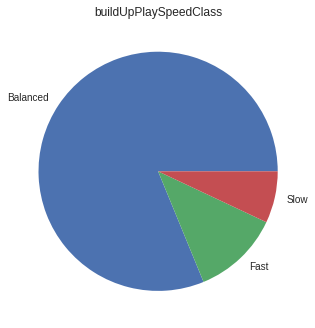



Little    1004
Normal     433
Lots        21
Name: buildUpPlayDribblingClass, dtype: int64


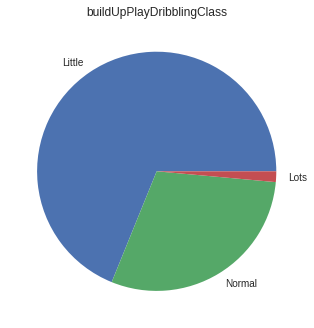



Mixed    1236
Short     128
Long       94
Name: buildUpPlayPassingClass, dtype: int64


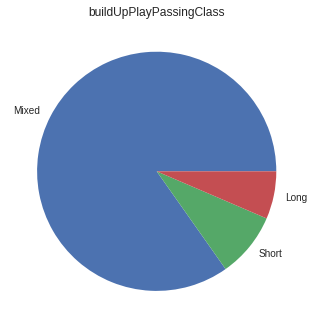



Organised    1386
Free Form      72
Name: buildUpPlayPositioningClass, dtype: int64


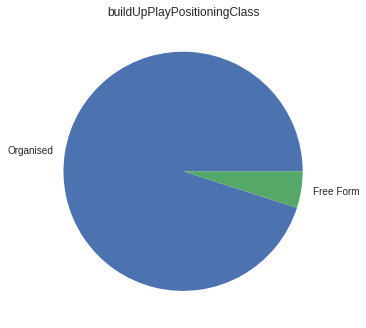



Normal    1231
Risky      171
Safe        56
Name: chanceCreationPassingClass, dtype: int64


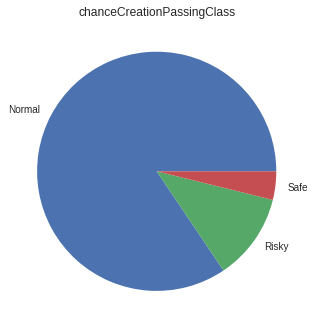



Normal    1195
Lots       211
Little      52
Name: chanceCreationCrossingClass, dtype: int64


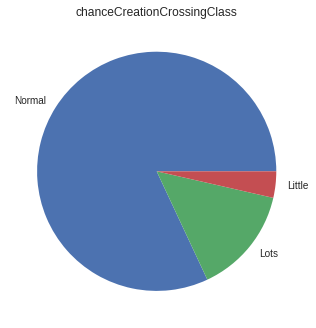



Normal    1224
Lots       197
Little      37
Name: chanceCreationShootingClass, dtype: int64


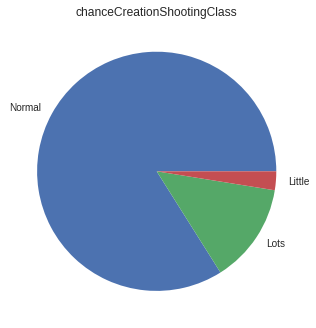



Organised    1309
Free Form     149
Name: chanceCreationPositioningClass, dtype: int64


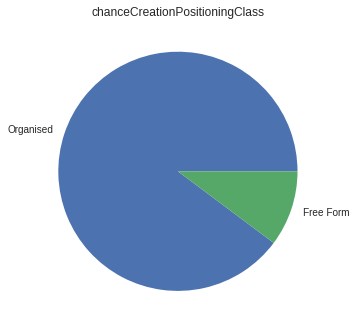



Medium    1243
Deep       154
High        61
Name: defencePressureClass, dtype: int64


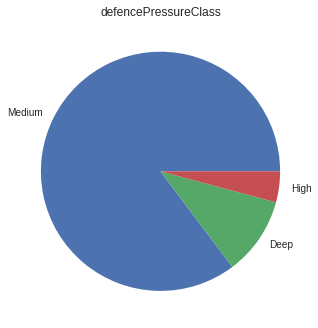



Press      1274
Double       99
Contain      85
Name: defenceAggressionClass, dtype: int64


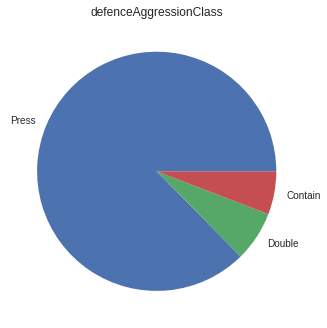



Normal    1286
Wide       111
Narrow      61
Name: defenceTeamWidthClass, dtype: int64


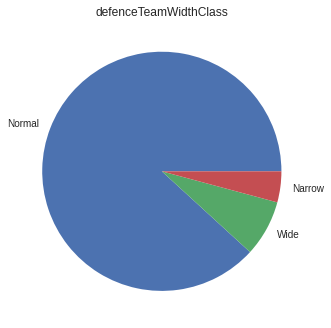



Cover           1362
Offside Trap      96
Name: defenceDefenderLineClass, dtype: int64


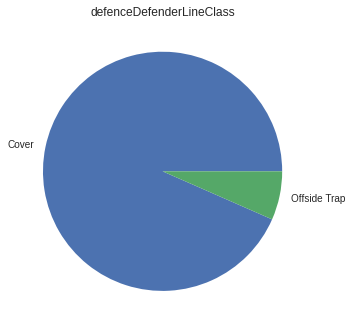

In [133]:
for i in cat_cols[4:]:
    statisticAttributeClass(i)
    print('\n')


In 12 pie charts above, we find the style play that almost teams apply to attribute classes.

In [134]:
frequent_attrs_class = dict()
for i in cat_cols[4:]:
    frequent_attrs_class.update({i : df_team_attribute[i].value_counts().values.max()})
frequent_attrs_class

{'buildUpPlaySpeedClass': 1184,
 'buildUpPlayDribblingClass': 1004,
 'buildUpPlayPassingClass': 1236,
 'buildUpPlayPositioningClass': 1386,
 'chanceCreationPassingClass': 1231,
 'chanceCreationCrossingClass': 1195,
 'chanceCreationShootingClass': 1224,
 'chanceCreationPositioningClass': 1309,
 'defencePressureClass': 1243,
 'defenceAggressionClass': 1274,
 'defenceTeamWidthClass': 1286,
 'defenceDefenderLineClass': 1362}

Therefore, now, we find top 10 football teams that have the top win match and analyse the style play of them. We will compare the similar in them and the frequent_attrs_class we find above.

In [135]:
match_features = ['id', 'country_id','league_id', 'season', 'date', 'match_api_id', 
                    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
df_match = df_match[match_features]
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [136]:
def winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return row['home_team_api_id']
    elif row['home_team_goal'] < row['away_team_goal']:
        return row['away_team_api_id']
    else:
        return 'Tie'

df_match['Winner'] = df_match.apply(winner, axis=1)
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Winner
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,Tie
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,Tie
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,8635
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,9991
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,9985
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,Tie


In [137]:
top_10_id_teams_most_victories = df_match['Winner'].value_counts()[1:11].keys()
df_team[df_team['team_api_id'].isin(top_10_id_teams_most_victories)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN
94,15617,9823,21.0,FC Bayern Munich,BMU
133,20522,9885,45.0,Juventus,JUV
161,26552,8593,245.0,Ajax,AJA
205,35283,9773,236.0,FC Porto,POR
216,35294,9772,234.0,SL Benfica,BEN
242,39395,9925,78.0,Celtic,CEL
256,43040,8633,243.0,Real Madrid CF,REA
258,43042,8634,241.0,FC Barcelona,BAR
287,49118,9931,896.0,FC Basel,BAS


We have had top 10 teams that have the most victory in the period of the dataset. 
So now, we start to analyse the team atrributes of ten football teams above.

In [138]:
df_team_attr_of_top_10 = df_team_attribute[df_team_attribute['team_api_id'].isin(top_10_id_teams_most_victories)]

In [175]:
df_team_attr_of_top_10[df_team_attr_of_top_10['team_api_id'] == 10260]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
806,807,11,10260,2010-02-22 00:00:00,70,Fast,NaN,Little,45,Mixed,...,65,Normal,Free Form,40,Medium,50,Press,40,Normal,Cover
807,808,11,10260,2011-02-22 00:00:00,65,Balanced,NaN,Little,40,Mixed,...,70,Lots,Free Form,45,Medium,45,Press,65,Normal,Cover
808,809,11,10260,2012-02-22 00:00:00,46,Balanced,NaN,Little,54,Mixed,...,55,Normal,Organised,40,Medium,50,Press,56,Normal,Cover
809,810,11,10260,2013-09-20 00:00:00,46,Balanced,NaN,Little,38,Mixed,...,37,Normal,Organised,49,Medium,49,Press,56,Normal,Cover
810,811,11,10260,2014-09-19 00:00:00,46,Balanced,34.0,Normal,54,Mixed,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
811,812,11,10260,2015-09-10 00:00:00,38,Balanced,42.0,Normal,44,Mixed,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover


In [141]:
df_team_attribute

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [142]:
df_team_attribute[num_cols].describe()

,buildUpPlayPassing,chanceCreationPassing,defencePressure,defenceTeamWidth,chanceCreationCrossing,chanceCreationShooting,buildUpPlayDribbling,buildUpPlaySpeed,defenceAggression
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000
mean,48.490398,52.165295,46.017147,52.185871,53.731824,53.969136,48.607362,52.462277,49.251029
std,10.896101,10.360793,10.227225,9.574712,11.086796,10.327566,9.678290,11.545869,9.738028
min,20.000000,21.000000,23.000000,29.000000,20.000000,22.000000,24.000000,20.000000,24.000000
25%,40.000000,46.000000,39.000000,47.000000,47.000000,48.000000,42.000000,45.000000,44.000000
50%,50.000000,52.000000,45.000000,52.000000,53.000000,53.000000,49.000000,52.000000,48.000000
75%,55.000000,59.000000,51.000000,58.000000,62.000000,61.000000,55.000000,62.000000,55.000000
max,80.000000,80.000000,72.000000,73.000000,80.000000,80.000000,77.000000,80.000000,72.000000


In [143]:
df_team_attribute['buildUpPlayDribbling'] = df_team_attribute['buildUpPlayDribbling'].fillna(df_team_attribute['buildUpPlayDribbling'].mean())
df_team_attribute['buildUpPlayDribbling']

0       48.607362
1       48.000000
2       41.000000
3       48.607362
4       48.607362
          ...    
1453    48.607362
1454    48.607362
1455    48.607362
1456    42.000000
1457    42.000000
Name: buildUpPlayDribbling, Length: 1458, dtype: float64

In [144]:
df_team_attribute[num_cols].describe()

,buildUpPlayPassing,chanceCreationPassing,defencePressure,defenceTeamWidth,chanceCreationCrossing,chanceCreationShooting,buildUpPlayDribbling,buildUpPlaySpeed,defenceAggression
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,48.490398,52.165295,46.017147,52.185871,53.731824,53.969136,48.607362,52.462277,49.251029
std,10.896101,10.360793,10.227225,9.574712,11.086796,10.327566,5.601170,11.545869,9.738028
min,20.000000,21.000000,23.000000,29.000000,20.000000,22.000000,24.000000,20.000000,24.000000
25%,40.000000,46.000000,39.000000,47.000000,47.000000,48.000000,48.607362,45.000000,44.000000
50%,50.000000,52.000000,45.000000,52.000000,53.000000,53.000000,48.607362,52.000000,48.000000
75%,55.000000,59.000000,51.000000,58.000000,62.000000,61.000000,48.607362,62.000000,55.000000
max,80.000000,80.000000,72.000000,73.000000,80.000000,80.000000,77.000000,80.000000,72.000000


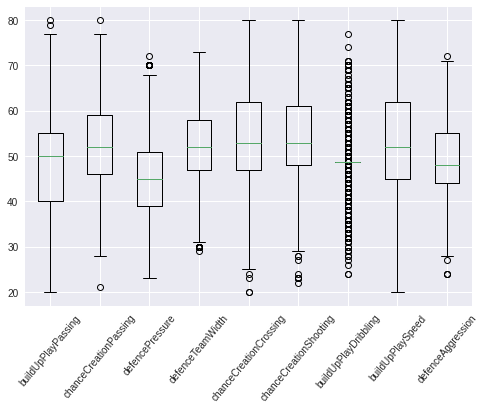

In [145]:
plt.style.use('seaborn')
plt.boxplot(df_team_attribute[num_cols])
plt.xticks([1,2,3,4,5,6,7,8,9], num_cols,rotation=50);

## 2. Tìm ra hãng cược nào uy tín nhất đoán được nhiều kết quả nhất 